# LOADING LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


# LOADING DATASET

In [4]:
churn = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
churn.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [5]:
churn.tail()

customer_id  credit_score  country  gender  age  tenure    balance  \
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
churn.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [116]:
churn.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [117]:
print(f"Our dataset contains customers from {churn.age.min()} up to {churn.age.max()} years old.")

Our dataset contains customers from 18 up to 92 years old.


In [119]:
print(f"The highest customer balance is {churn.balance.max()}.")

The highest customer balance is 250898.09.


Let's see the customer with higher balance and the one with higher salary:

In [120]:
churn.query(f"balance == {churn.balance.max()} or estimated_salary == {churn.estimated_salary.max()}")

customer_id  credit_score country  gender  age  tenure    balance  \
2092     15757408           655   Spain    Male   38       3  250898.09   
6646     15662021           685   Spain  Female   42       2       0.00   

      products_number  credit_card  active_member  estimated_salary  churn  
2092                3            0              1          81054.00      1  
6646                2            0              0         199992.48      0

Let's see the top 3 balance and salary:

In [126]:
churn.query(f"balance in {churn.balance.nlargest(3).to_list()} or estimated_salary in {churn.estimated_salary.nlargest(3).to_list()}").\
sort_values(by='estimated_salary', ascending=False)

customer_id  credit_score  country  gender  age  tenure    balance  \
6646     15662021           685    Spain  Female   42       2       0.00   
3580     15634359           639  Germany  Female   41       5   98635.77   
4417     15697270           608    Spain    Male   27       4  153325.10   
3280     15715622           583   France  Female   57       3  238387.56   
8733     15714241           749    Spain    Male   42       9  222267.63   
2092     15757408           655    Spain    Male   38       3  250898.09   

      products_number  credit_card  active_member  estimated_salary  churn  
6646                2            0              0         199992.48      0  
3580                1            1              0         199970.74      0  
4417                1            1              1         199953.33      0  
3280                1            0              1         147964.99      1  
8733                1            0              0         101108.85      1  
2092                3            0              1          81054.00      1

# EXPLORATORY DATA ANALYSIS

Let's start by checking who are our customers

<AxesSubplot:>

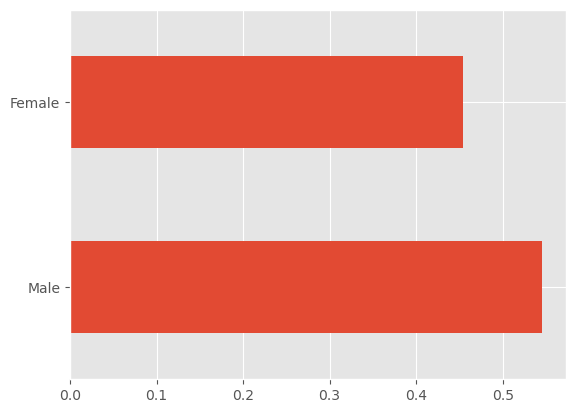

In [9]:
churn.gender.value_counts(1).plot.barh()

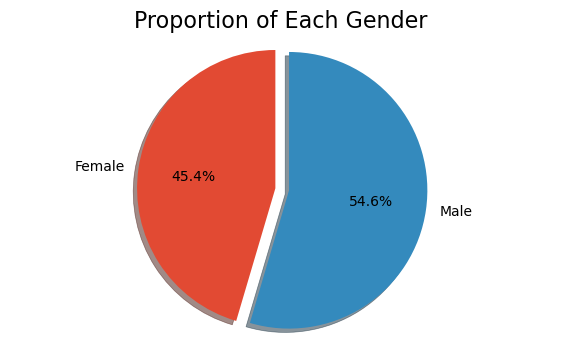

In [22]:
labels = 'Female', 'Male'
sizes = [len(churn[churn['gender']=='Female'])/len(churn), len(churn[churn['gender']=='Male'])/len(churn)]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 4))
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%', )
ax1.axis('equal')
plt.title("Proportion of Each Gender", size = 16)
plt.show()

Let's check our categorical variables:

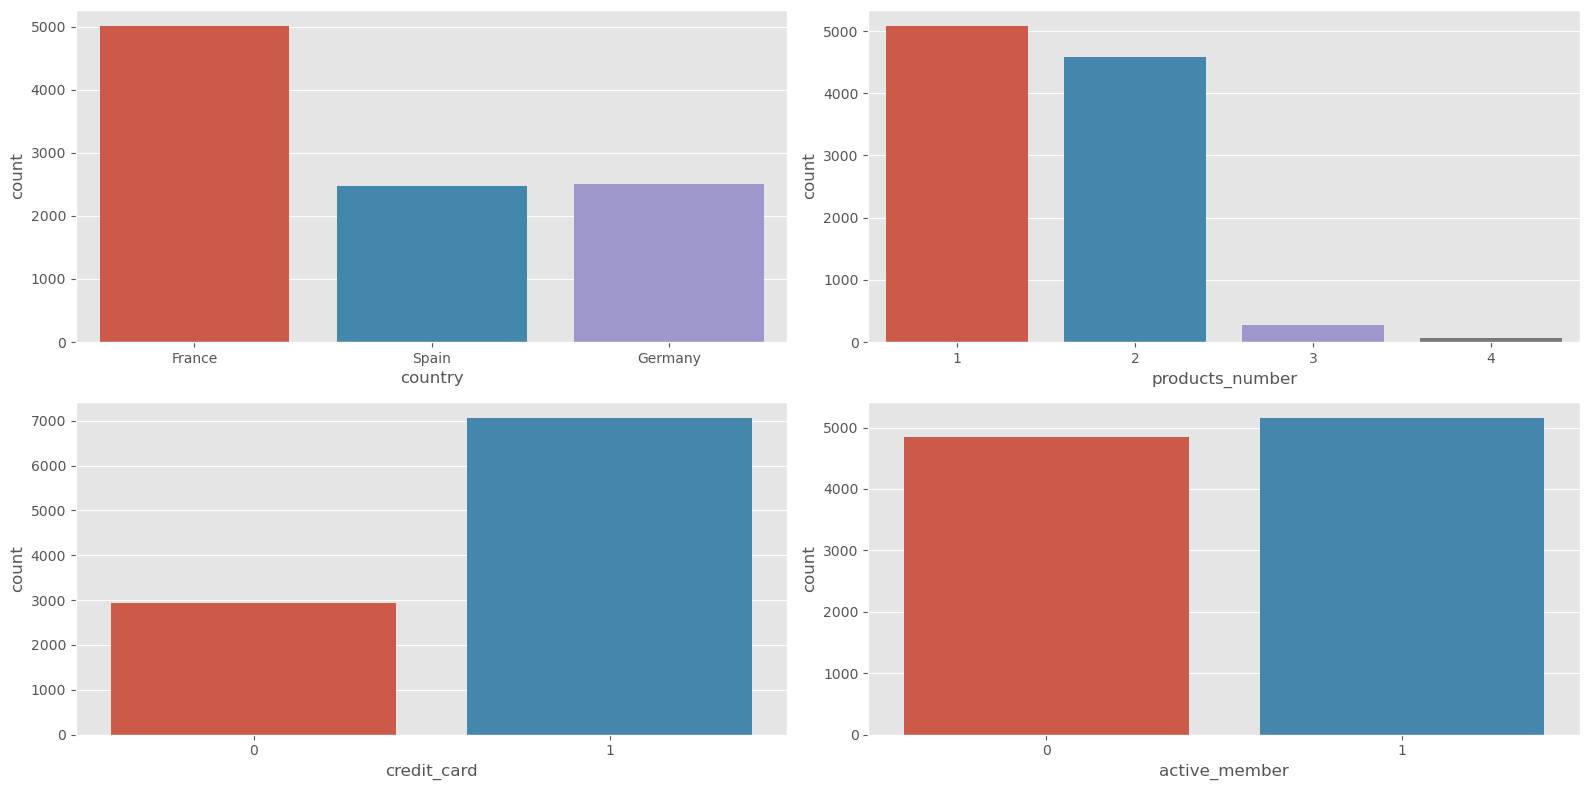

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
_ = sns.countplot(data=churn, x='country', ax=axes[0][0])
_ = sns.countplot(data=churn, x='products_number', ax=axes[0][1])
_ = sns.countplot(data=churn, x='credit_card', ax=axes[1][0])
_ = sns.countplot(data=churn, x='active_member', ax=axes[1][1])
_ = plt.tight_layout()

Checking balance column:

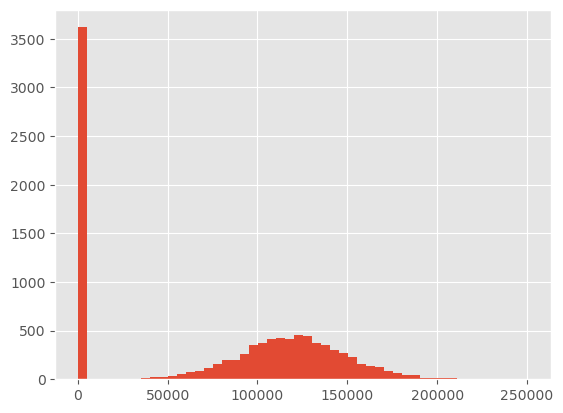

In [81]:
_ = plt.hist(churn.balance, bins=50)

In [83]:
churn.query('balance <= 0 ')

customer_id  credit_score country  gender  age  tenure  balance  \
0        15634602           619  France  Female   42       2      0.0   
3        15701354           699  France  Female   39       1      0.0   
6        15592531           822  France    Male   50       7      0.0   
11       15737173           497   Spain    Male   24       3      0.0   
12       15632264           476  France  Female   34      10      0.0   
...           ...           ...     ...     ...  ...     ...      ...   
9989     15605622           841   Spain    Male   28       4      0.0   
9992     15657105           726   Spain    Male   36       2      0.0   
9994     15719294           800  France  Female   29       2      0.0   
9995     15606229           771  France    Male   39       5      0.0   
9997     15584532           709  France  Female   36       7      0.0   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
3                   2            0              0          93826.63      0  
6                   2            1              1          10062.80      0  
11                  2            1              0          76390.01      0  
12                  2            1              0          26260.98      0  
...               ...          ...            ...               ...    ...  
9989                2            1              1         179436.60      0  
9992                1            1              0         195192.40      0  
9994                2            0              0         167773.55      0  
9995                2            1              0          96270.64      0  
9997                1            0              1          42085.58      1  

[3617 rows x 12 columns]

In [92]:
zero_balance_customers = len(churn.query('balance ==0'))
                             
print(f"We have {zero_balance_customers} customers with zero balance.")

We have 3617 customers with zero balance.


In [94]:
above_zero_balance_customers = len(churn.query('balance > 0'))
print(f"We have {above_zero_balance_customers} customers with something in balance.")

We have 6383 customers with something in balance.


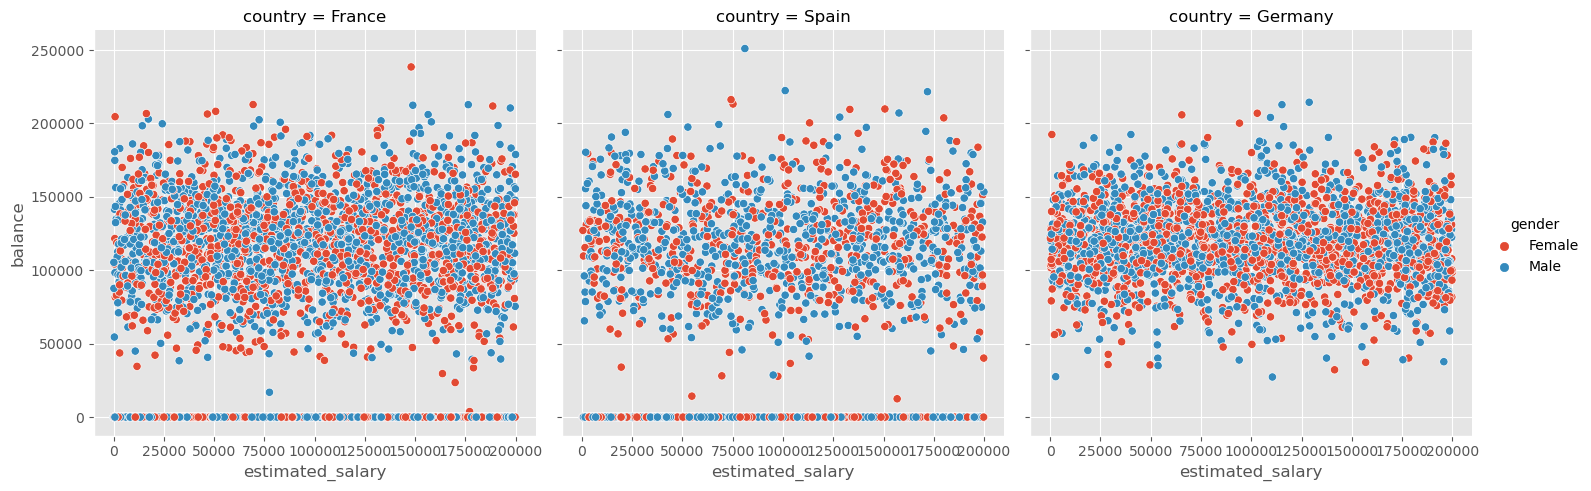

In [112]:
_ = sns.relplot(x='estimated_salary', y='balance', data=churn, hue='gender', color='b', col='country')

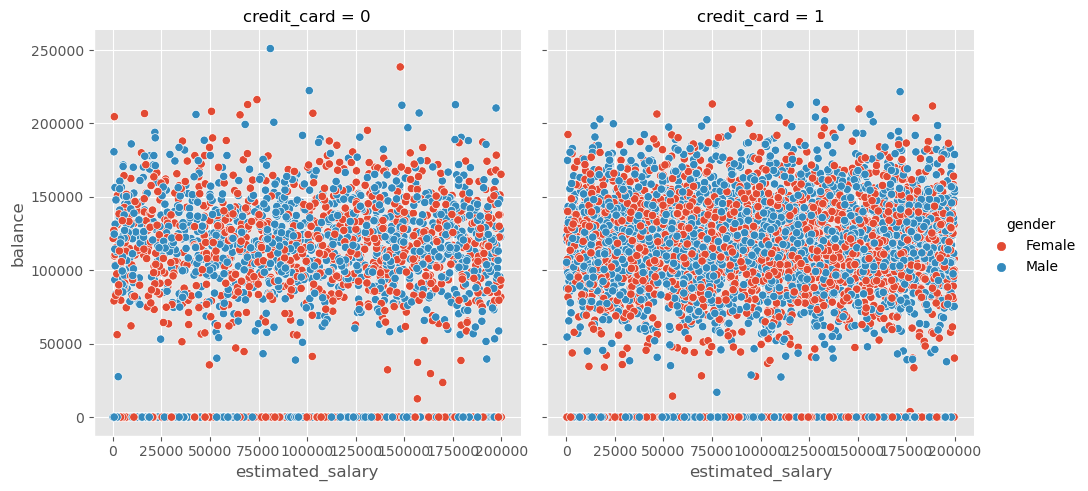

In [114]:
_ = sns.relplot(x='estimated_salary', y='balance', data=churn, hue='gender', color='b', col='credit_card')

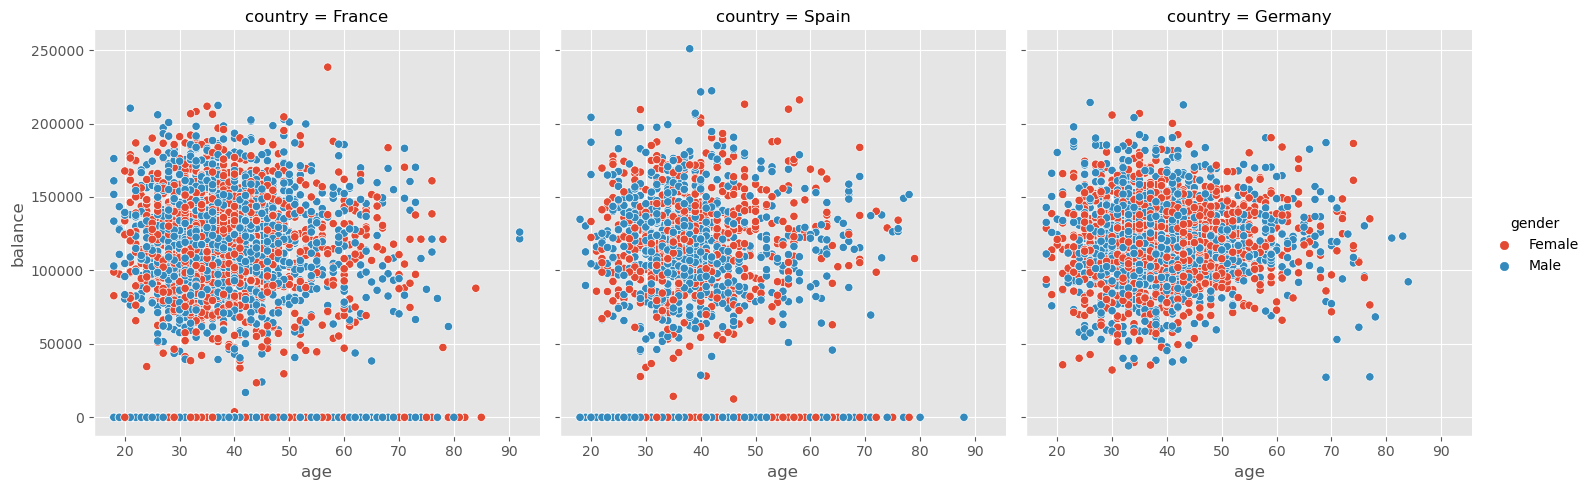

In [113]:
_ = sns.relplot(x='age', y='balance', data=churn, hue='gender', color='b', col='country')

Our customers salary:

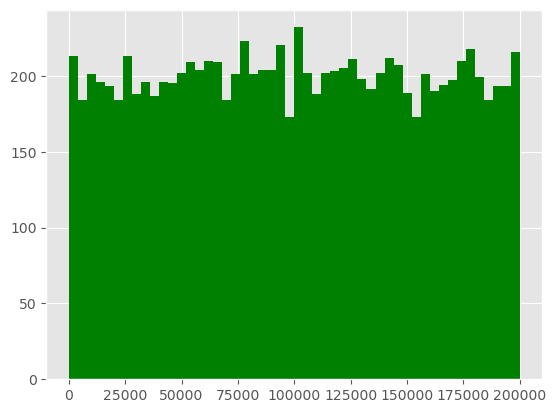

In [103]:
_ = plt.hist(churn.estimated_salary, bins=50, color='g')

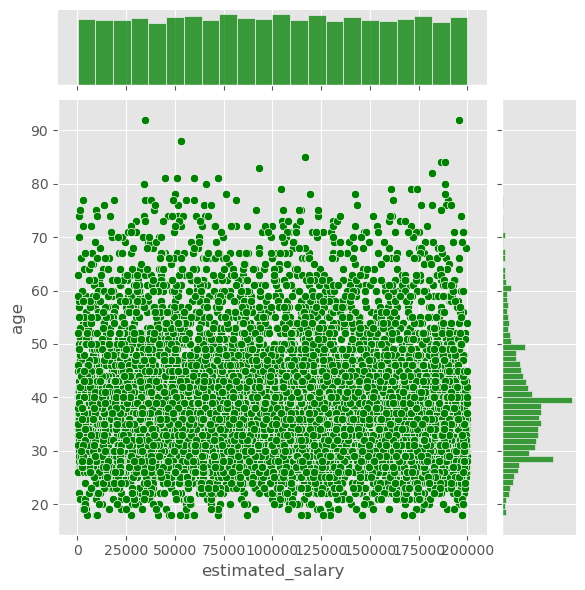

In [102]:
sns.jointplot(x='estimated_salary', y='age', data=churn, color='g')

In [98]:
churn.describe().T

count          mean           std          min  \
customer_id       10000.0  1.569094e+07  71936.186123  15565701.00   
credit_score      10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
tenure            10000.0  5.012800e+00      2.892174         0.00   
balance           10000.0  7.648589e+04  62397.405202         0.00   
products_number   10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
active_member     10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                          25%           50%           75%          max  
customer_id       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
credit_score           584.00  6.520000e+02  7.180000e+02       850.00  
age                     32.00  3.700000e+01  4.400000e+01        92.00  
tenure                   3.00  5.000000e+00  7.000000e+00        10.00  
balance                  0.00  9.719854e+04  1.276442e+05    250898.09  
products_number          1.00  1.000000e+00  2.000000e+00         4.00  
credit_card              0.00  1.000000e+00  1.000000e+00         1.00  
active_member            0.00  1.000000e+00  1.000000e+00         1.00  
estimated_salary     51002.11  1.001939e+05  1.493882e+05    199992.48  
churn                    0.00  0.000000e+00  0.000000e+00         1.00

# TARGET ANALYSIS

Now, let's exam our target, the churn column. We are going to try to understand which variables are related to customer churn. This information is very useful, because we can use it to predict customers from leaving our company by giving some discount or negotiating some pending debt. If we know that the customer is leaving and each customer bring an additional XXX usd to the company, we just need to take some action that will cost us less than XXX usd by customer in order to have something profitable.

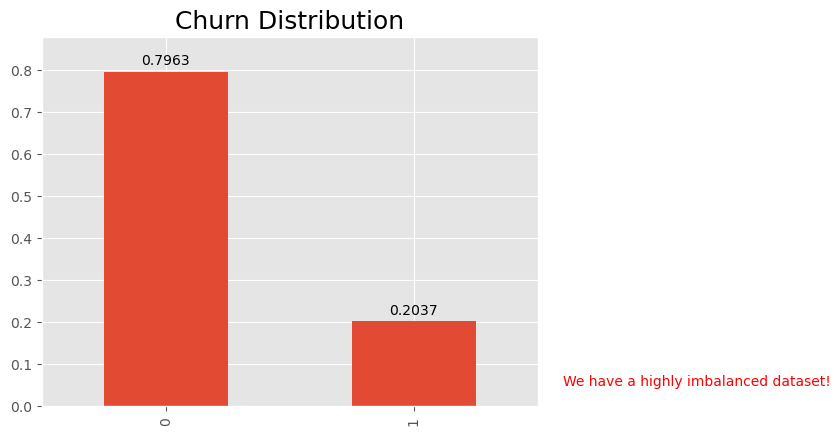

In [63]:
_ = churn.churn.value_counts(1).plot.bar()
_ = plt.title('Churn Distribution', size = 18)
_ = plt.text(-0.1, 0.815, churn.churn.value_counts(1)[0])
_ = plt.text(0.9, 0.22, churn.churn.value_counts(1)[1])
_ = plt.ylim(0, 0.88)
_ = plt.text(1.6, 0.05, "We have a highly imbalanced dataset!", color='r')

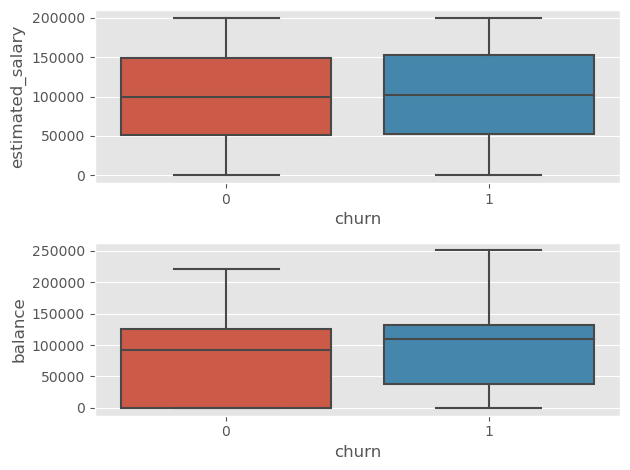

In [65]:
fig, axes = plt.subplots(2, 1)

_ = sns.boxplot(data=churn, x='churn', y='estimated_salary', ax=axes[0])
_ = sns.boxplot(data=churn, x='churn', y='balance', ax=axes[1])

fig.tight_layout()

In [26]:
from scipy.stats import skew

agg_func = {
    'estimated_salary': ['min', 'median', 'mean', 'max', 'std', skew],
    'balance': ['min', 'median', 'mean', 'max', 'std', skew],
    'credit_card':['mean'],
    'active_member':['mean']
}

churn.groupby(['churn']).agg(agg_func)

estimated_salary                                                     \
                   min     median           mean        max           std   
churn                                                                       
0                90.07   99645.04   99738.391772  199992.48  57405.586966   
1                11.58  102460.84  101465.677531  199808.10  57912.418071   

                balance                                                    \
           skew     min     median          mean        max           std   
churn                                                                       
0      0.010994     0.0   92072.68  72745.296779  221532.80  62848.040701   
1     -0.033080     0.0  109349.29  91108.539337  250898.09  58360.794816   

                credit_card active_member  
           skew        mean          mean  
churn                                      
0     -0.046879    0.707146      0.554565  
1     -0.512354    0.699067      0.360825

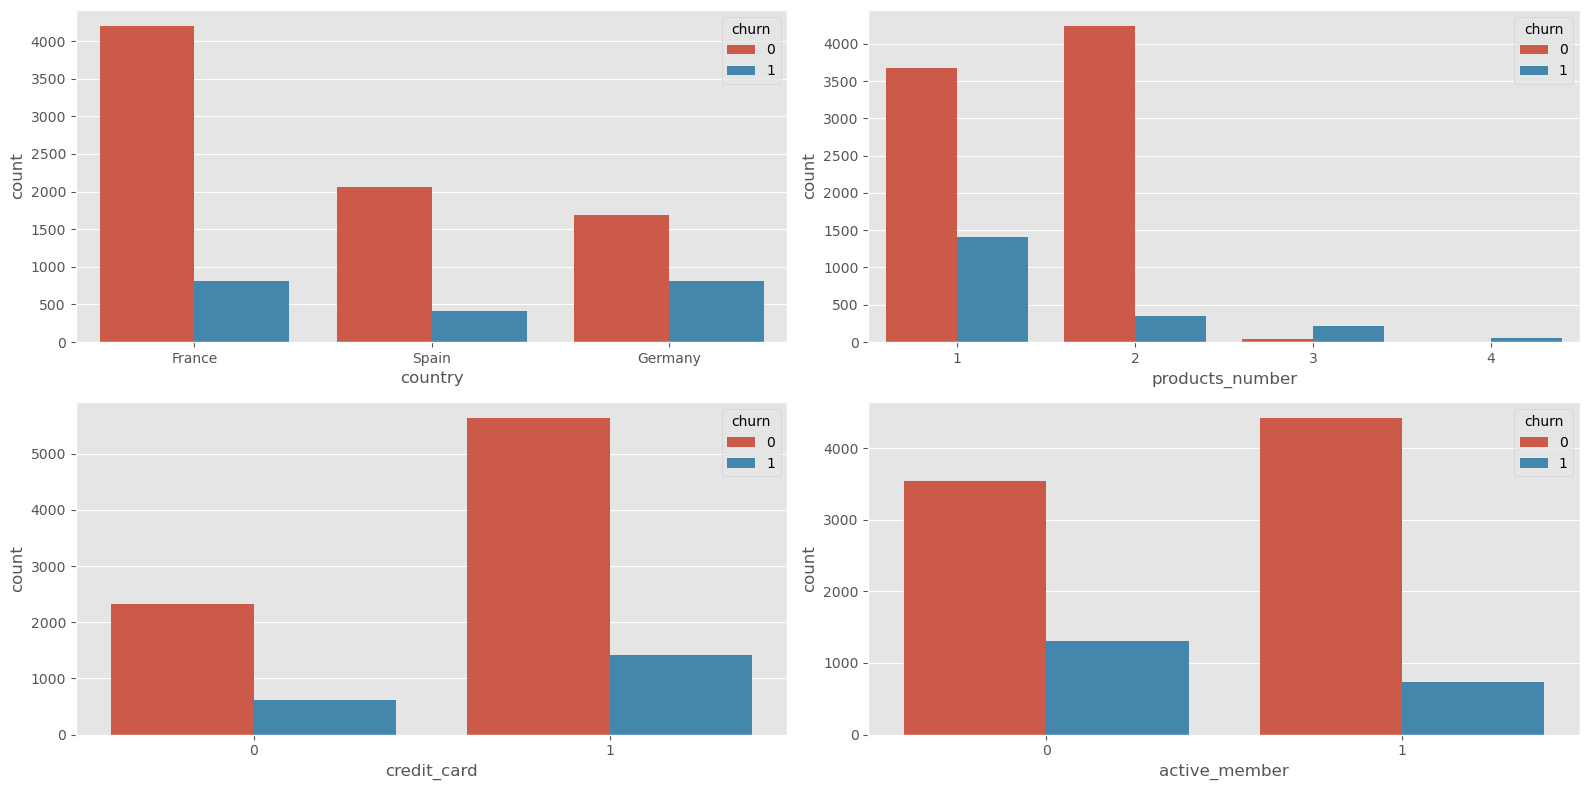

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
_ = sns.countplot(data=churn, x='country', hue='churn', ax=axes[0][0])
_ = sns.countplot(data=churn, x='products_number', hue='churn', ax=axes[0][1])
_ = sns.countplot(data=churn, x='credit_card', hue='churn', ax=axes[1][0])
_ = sns.countplot(data=churn, x='active_member', hue='churn', ax=axes[1][1])
_ = plt.tight_layout()

It looks like customers from Germany have a higher propensity to churn. The numbers of products and member activation are also related to churn. Let's take a closer look at this probability:

In [77]:
churn.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

In [80]:
churn.groupby('products_number')['churn'].mean().sort_values()

products_number
2    0.075817
1    0.277144
3    0.827068
4    1.000000
Name: churn, dtype: float64

In [78]:
churn.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

In [79]:
churn.groupby('active_member')['churn'].mean().sort_values()

active_member
1    0.142691
0    0.268509
Name: churn, dtype: float64

Not being a member increases the probability of churn a lot! Almost double it! We should get a better understanding of how this activation works!